In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [64]:
data = pd.read_csv(r"C:\Users\Arun Kumaran\Desktop\Renewable_Energy_Forecasting.csv")
data['Energy_Output'] = data['Energy_Output_Class'].map({'Low': 0, 'Moderate': 1, 'High': 2})
X = data.drop(columns=['Energy_Output_Class', 'Energy_Output'])
y = data['Energy_Output']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [84]:
def predict_output(features):
    prediction = model.predict([features])[0]
    if prediction < 0.5:
        return "Low"
    elif prediction < 1.5:
        return "Moderate"
    else:
        return "High"

input_features = [float(input(f"Enter value for {col}: ")) for col in X.columns]
predicted_class = predict_output(input_features)
print(f"Predicted Energy Output Class: {predicted_class}")



Enter value for Solar_Irradiance:  0.12
Enter value for Wind_Speed:  0.15
Enter value for Temperature:  0.36
Enter value for Humidity:  0.45
Enter value for Panel_Type:  0.67
Enter value for Battery_Storage_Capacity:  0.78
Enter value for Wind_Turbine_Efficiency:  0.74
Enter value for Cloud_Cover:  0.128
Enter value for Time_of_Day:  0.145
Enter value for Season:  0.854


Predicted Energy Output Class: Moderate


D:\conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


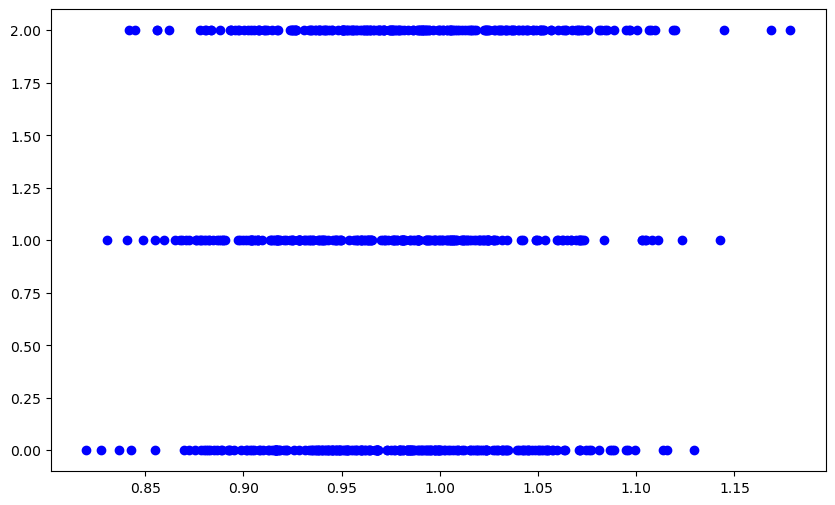

In [86]:
plt.figure(figsize=(10, 6))
plt.scatter(model.predict(X_train), y_train, color='blue', label='Training Data')

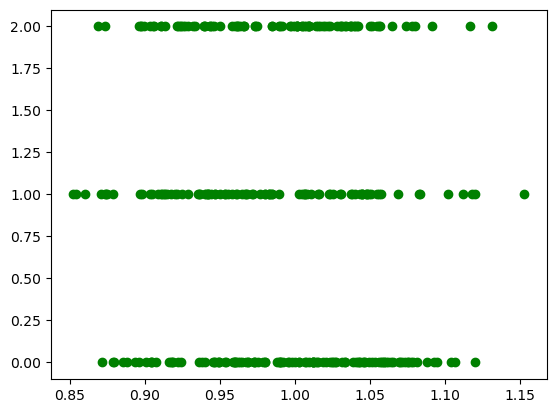

In [88]:
plt.scatter(model.predict(X_test), y_test, color='green', label='Testing Data')

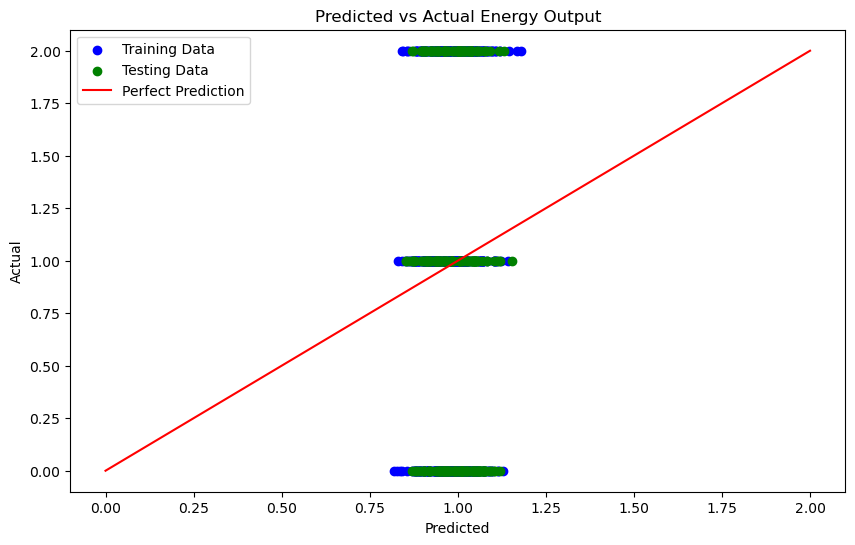

In [90]:
plt.figure(figsize=(10, 6))
plt.scatter(model.predict(X_train), y_train, color='blue', label='Training Data')
plt.scatter(model.predict(X_test), y_test, color='green', label='Testing Data')
plt.plot([0, 2], [0, 2], color='red', label='Perfect Prediction')
plt.title('Predicted vs Actual Energy Output')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.legend()
plt.show()